#Downloading the dataset and installing the required libraries   

Downloading the required libraries and uploading the dataset into dataframe

In [1]:
from google.colab import files
uploaded = files.upload()  # This opens a file dialog for you to upload files

Saving Acoustic Features.csv to Acoustic Features.csv


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 12.8 MB/s eta 0:00:00


# Dataset Analysis  

Analysing the dataset using info and head functions.
Also, finding if there are any null or incorrect values in dataset.
As seen from the below output, there are no Null values.

In [5]:
import pandas as pd
music = pd.read_csv("Acoustic Features.csv")

music.info()
music.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


# Exploratory Data Analysis  

Plotting the histogram, bar plot, correlation plot and box charts to understand more about the data.  

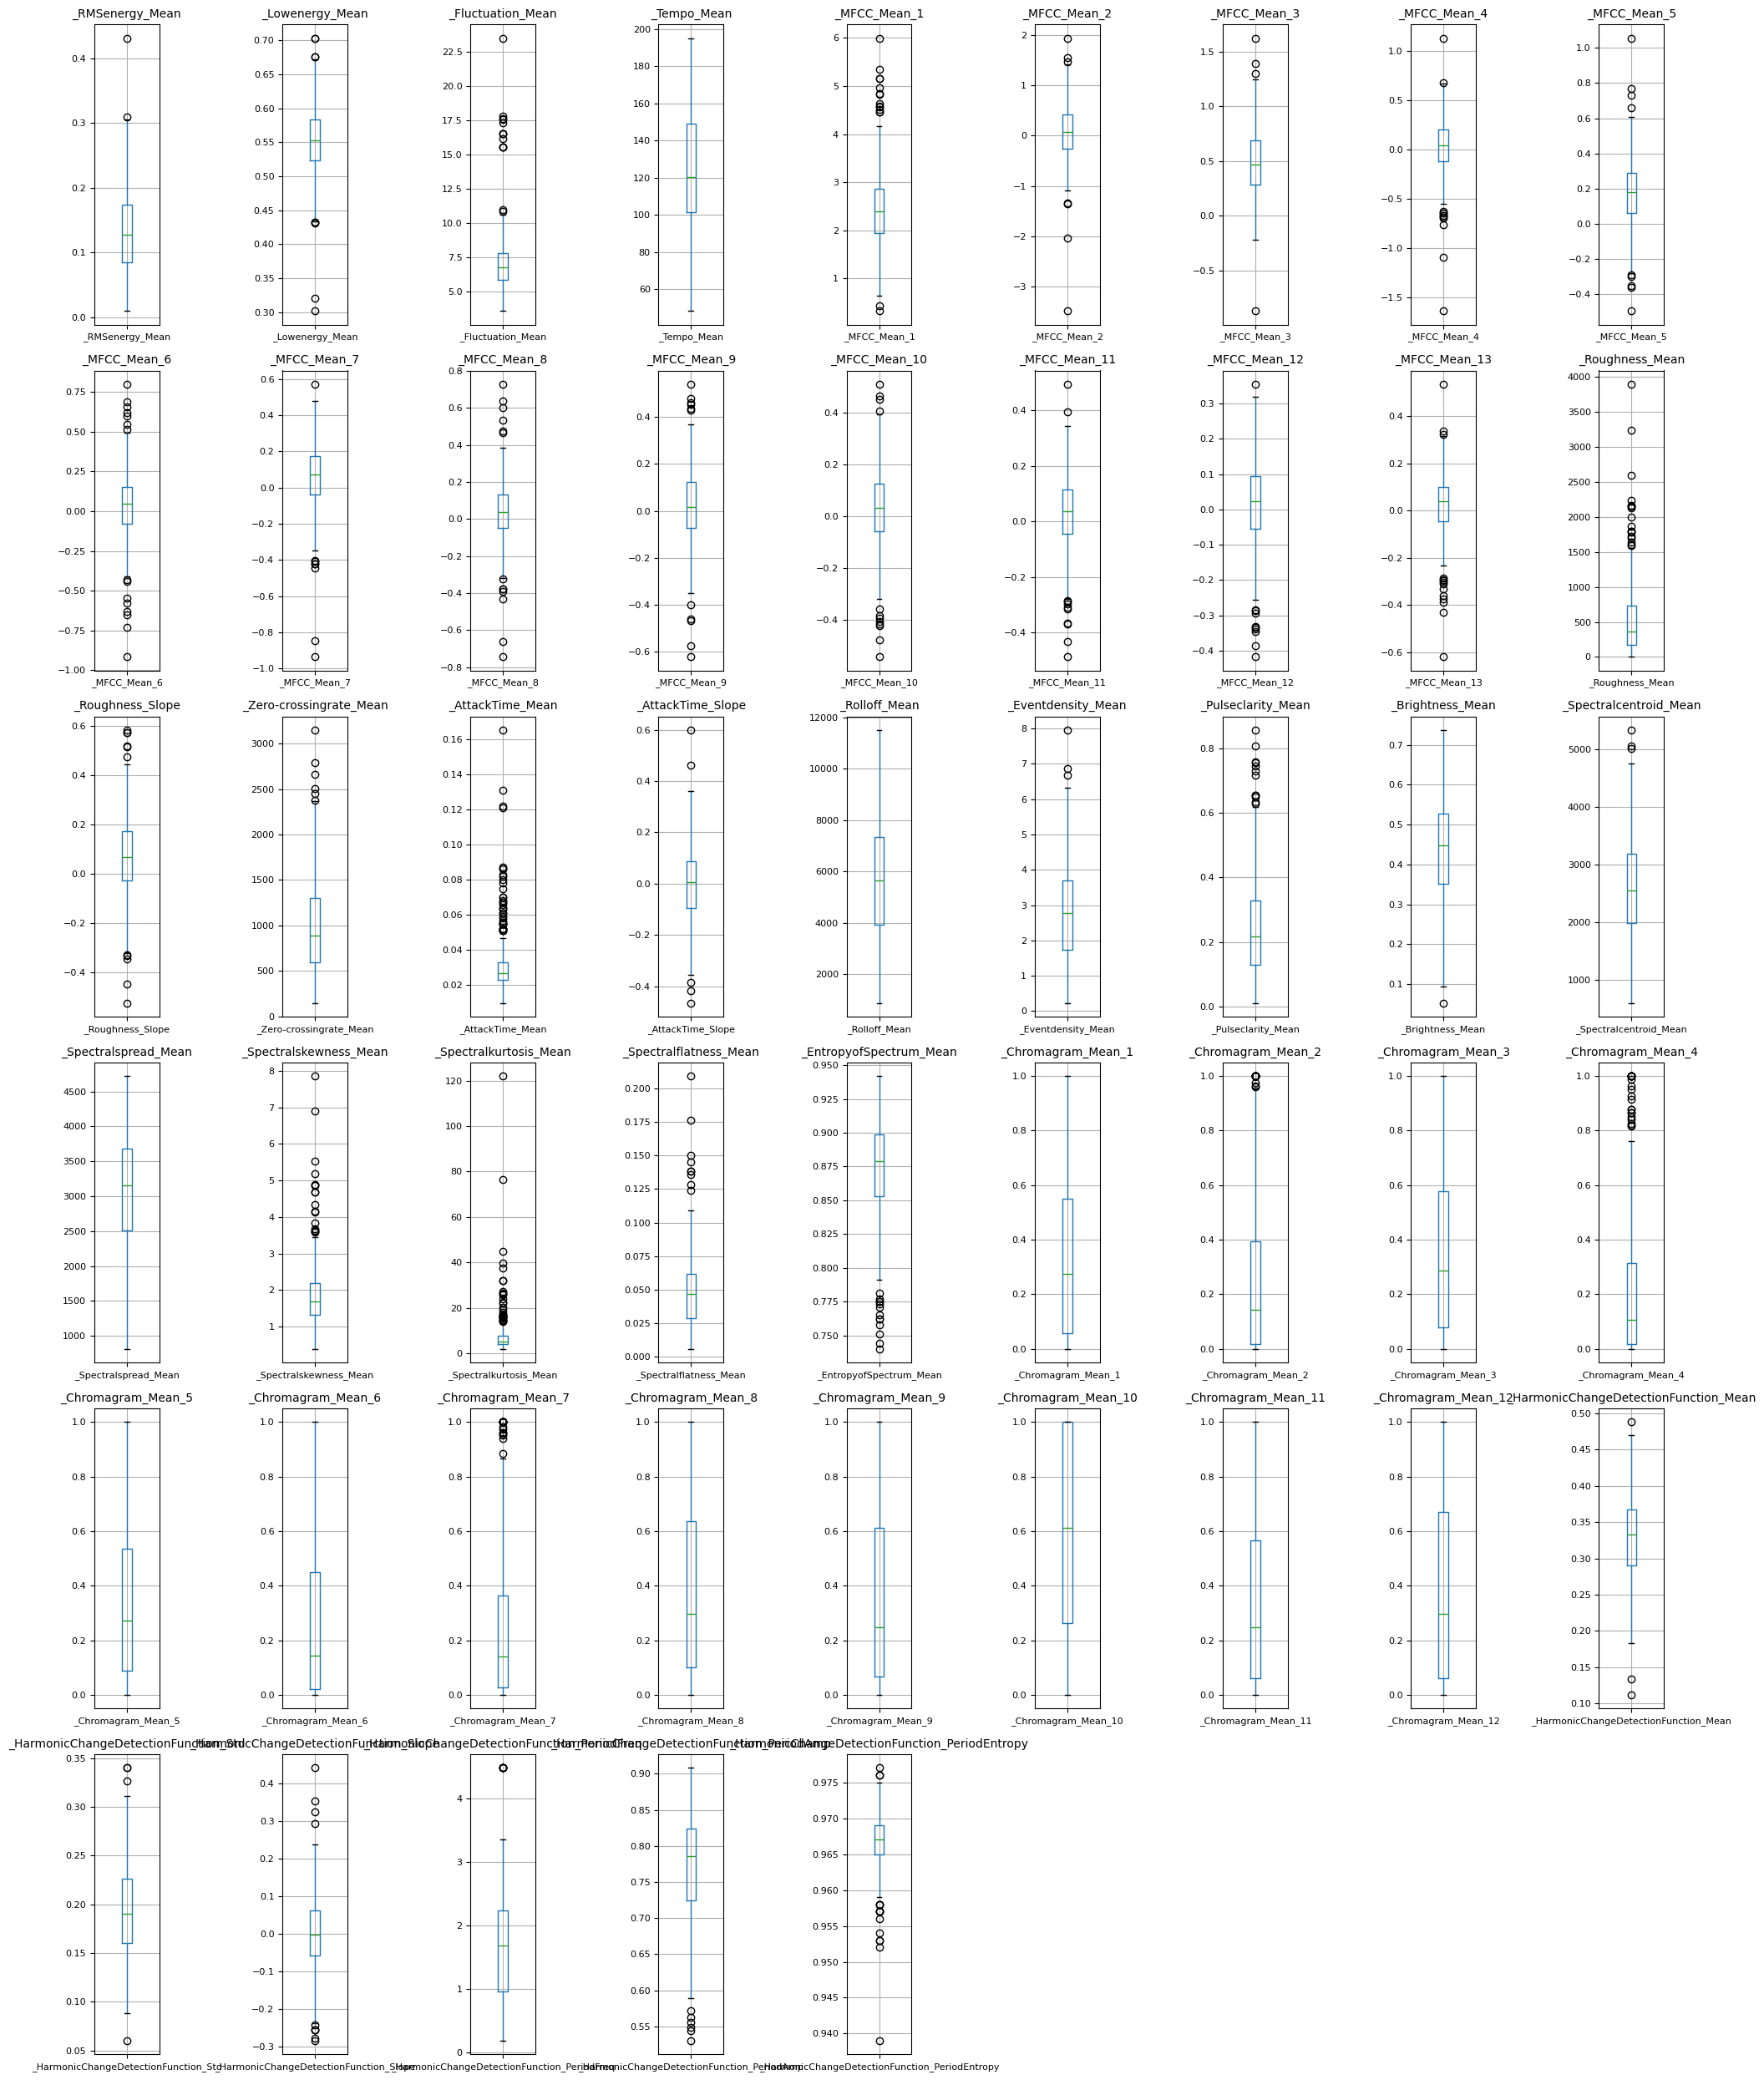

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig, axes = plt.subplots(6, 9, figsize=(20, 25))  # Adjust figure size

numeric_cols = music.select_dtypes(include=['number']).columns

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    music.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-10-89f96532cfdf>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 2))


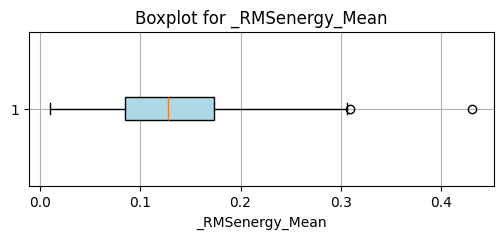

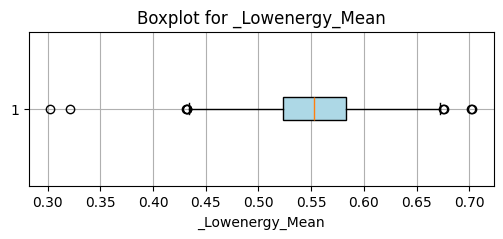

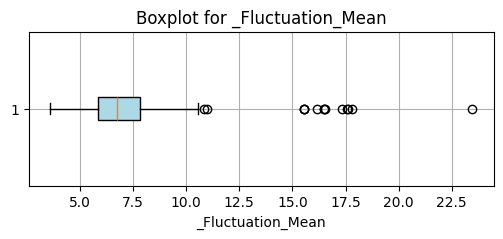

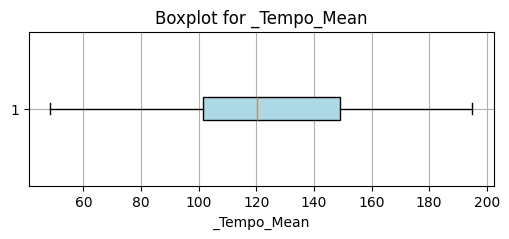

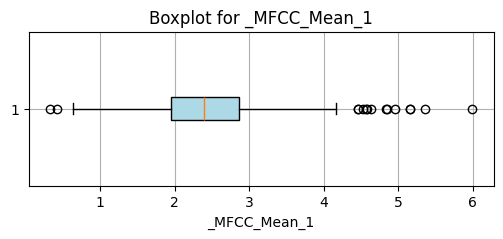

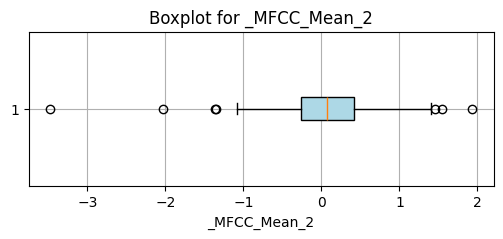

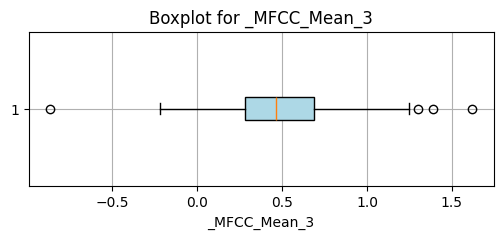

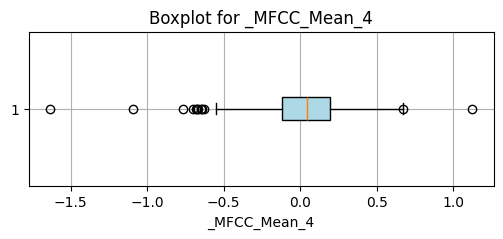

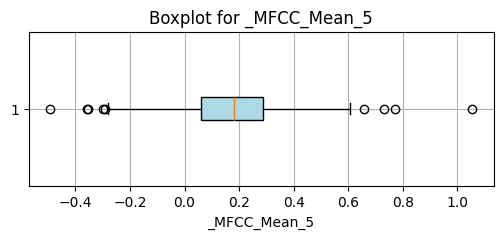

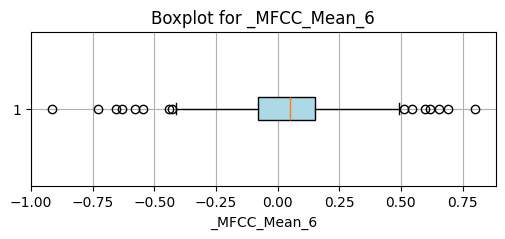

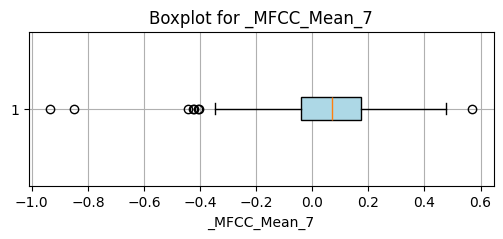

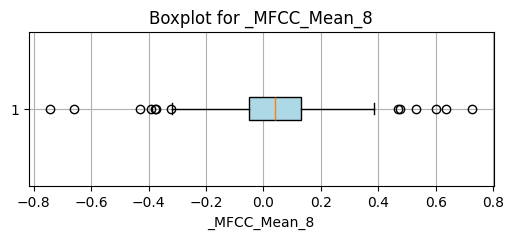

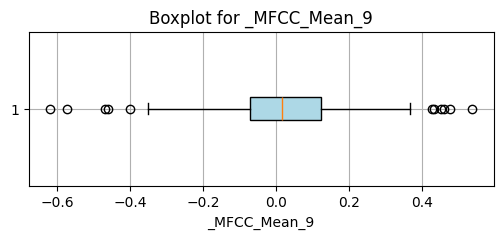

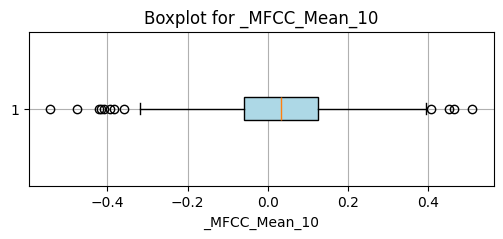

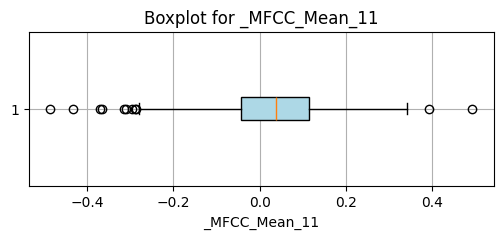

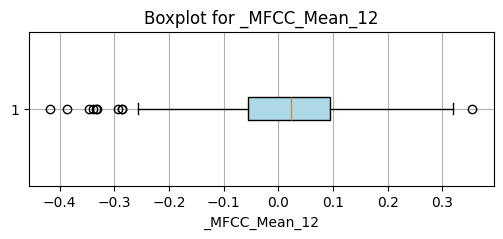

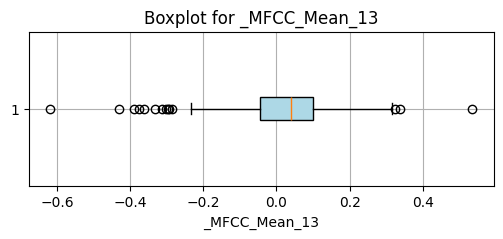

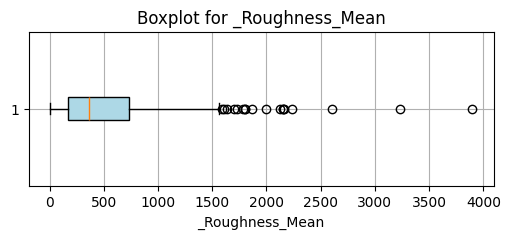

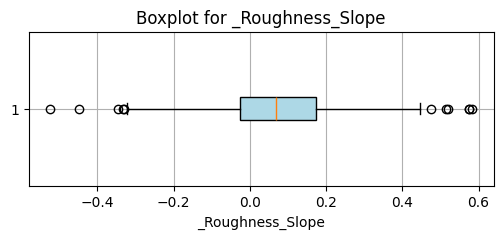

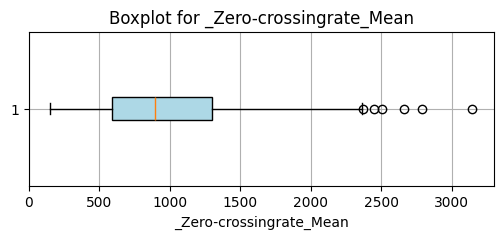

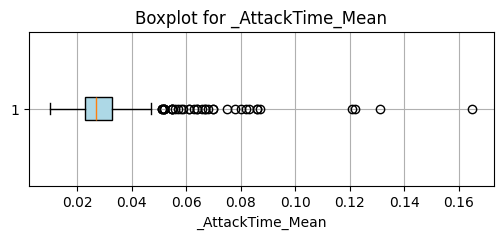

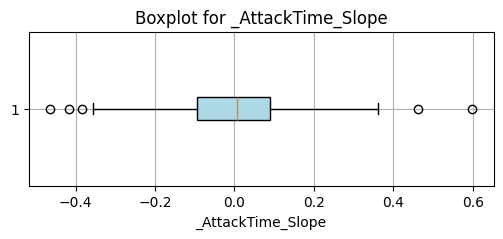

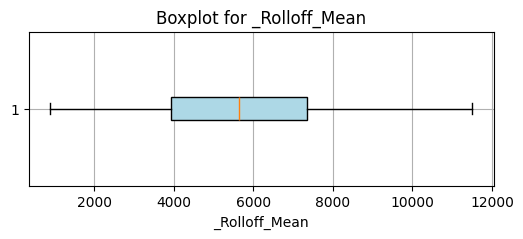

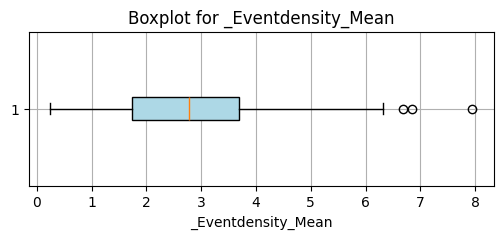

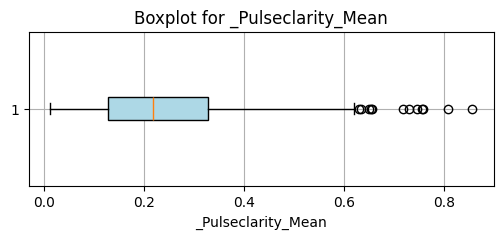

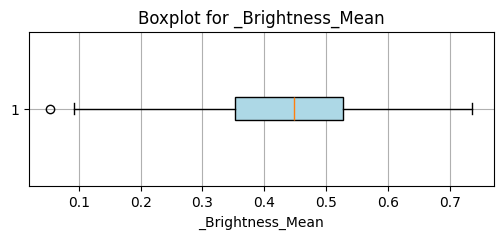

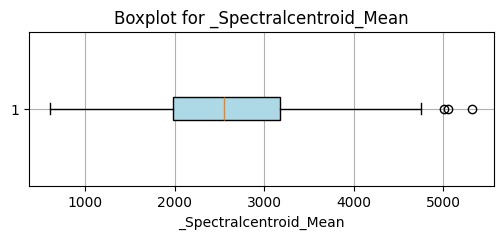

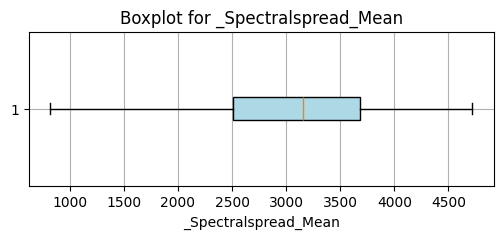

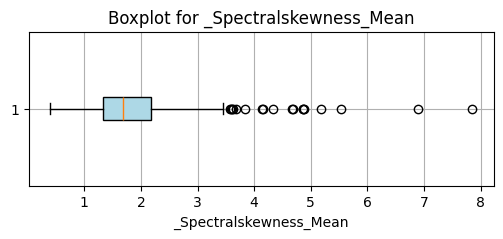

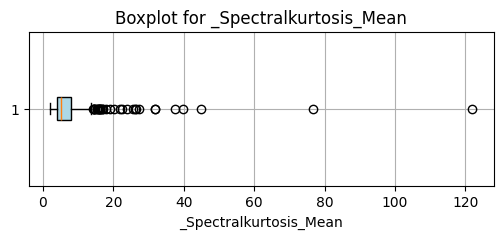

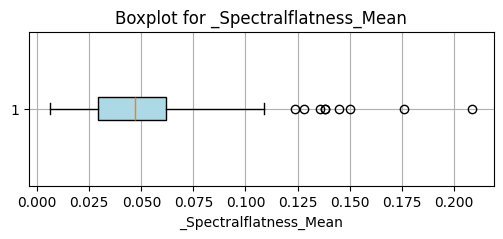

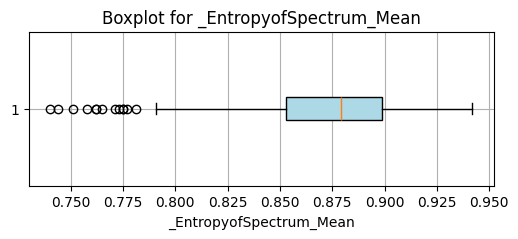

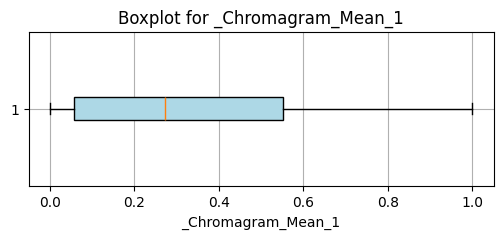

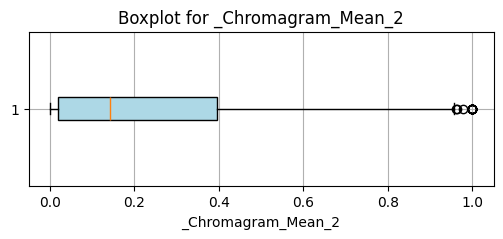

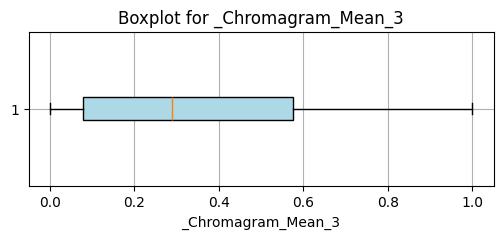

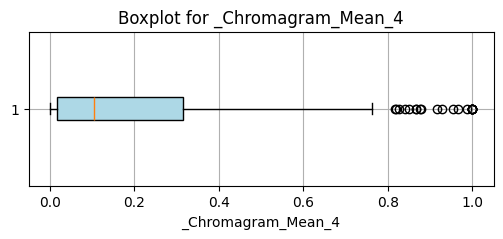

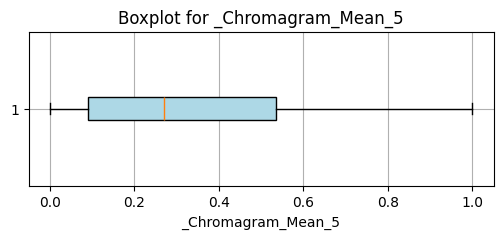

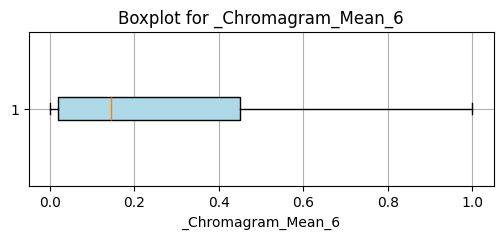

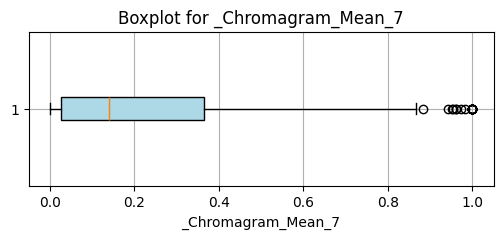

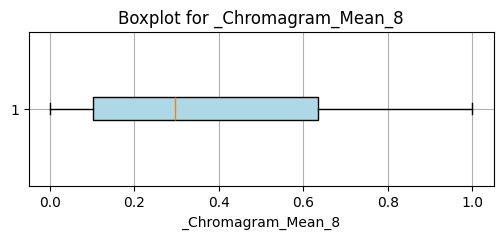

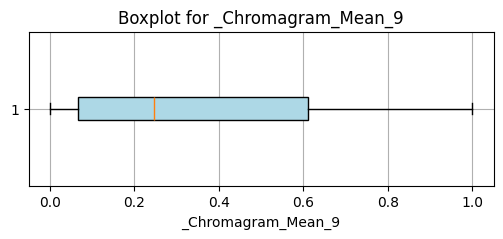

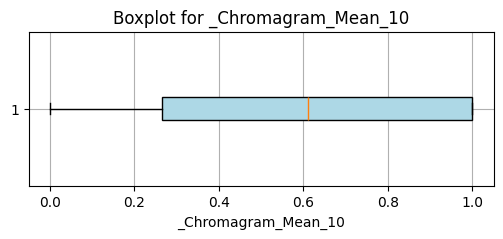

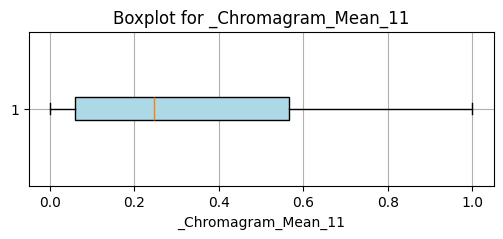

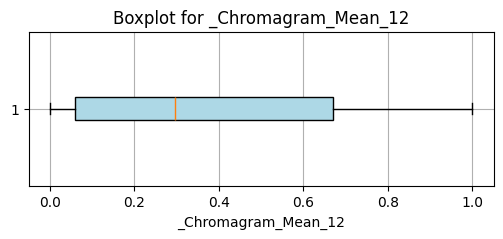

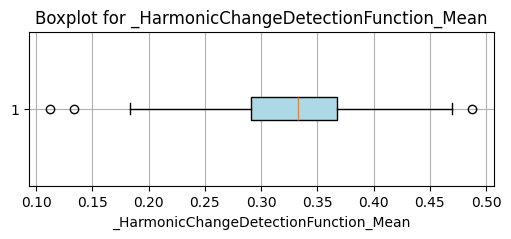

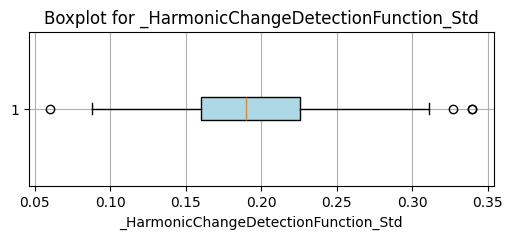

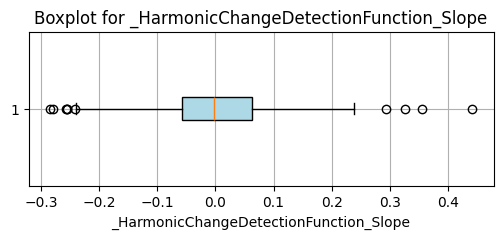

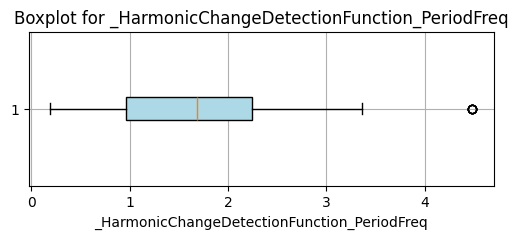

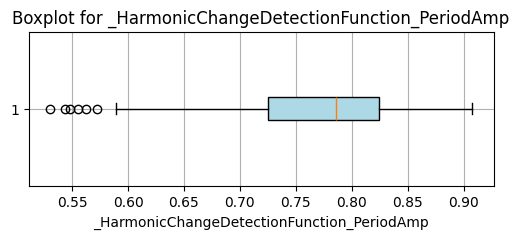

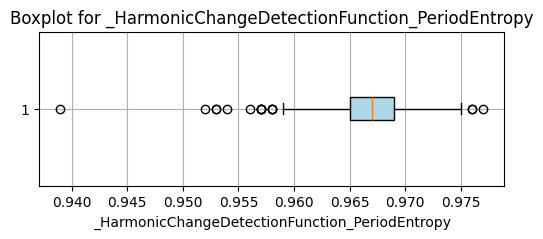

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through numeric columns and create separate boxplots
numeric_cols = music.select_dtypes(include=['number']).columns


for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    plt.boxplot(music[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))

    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.grid(True)
    #plt.show()



As seen from the above boxplots, there are very few outliers for some columns.
Proceeding without dropping the outliers, as the number of outliers are very less and if we drop them the dataset would get very small.  Model has been build by including them.

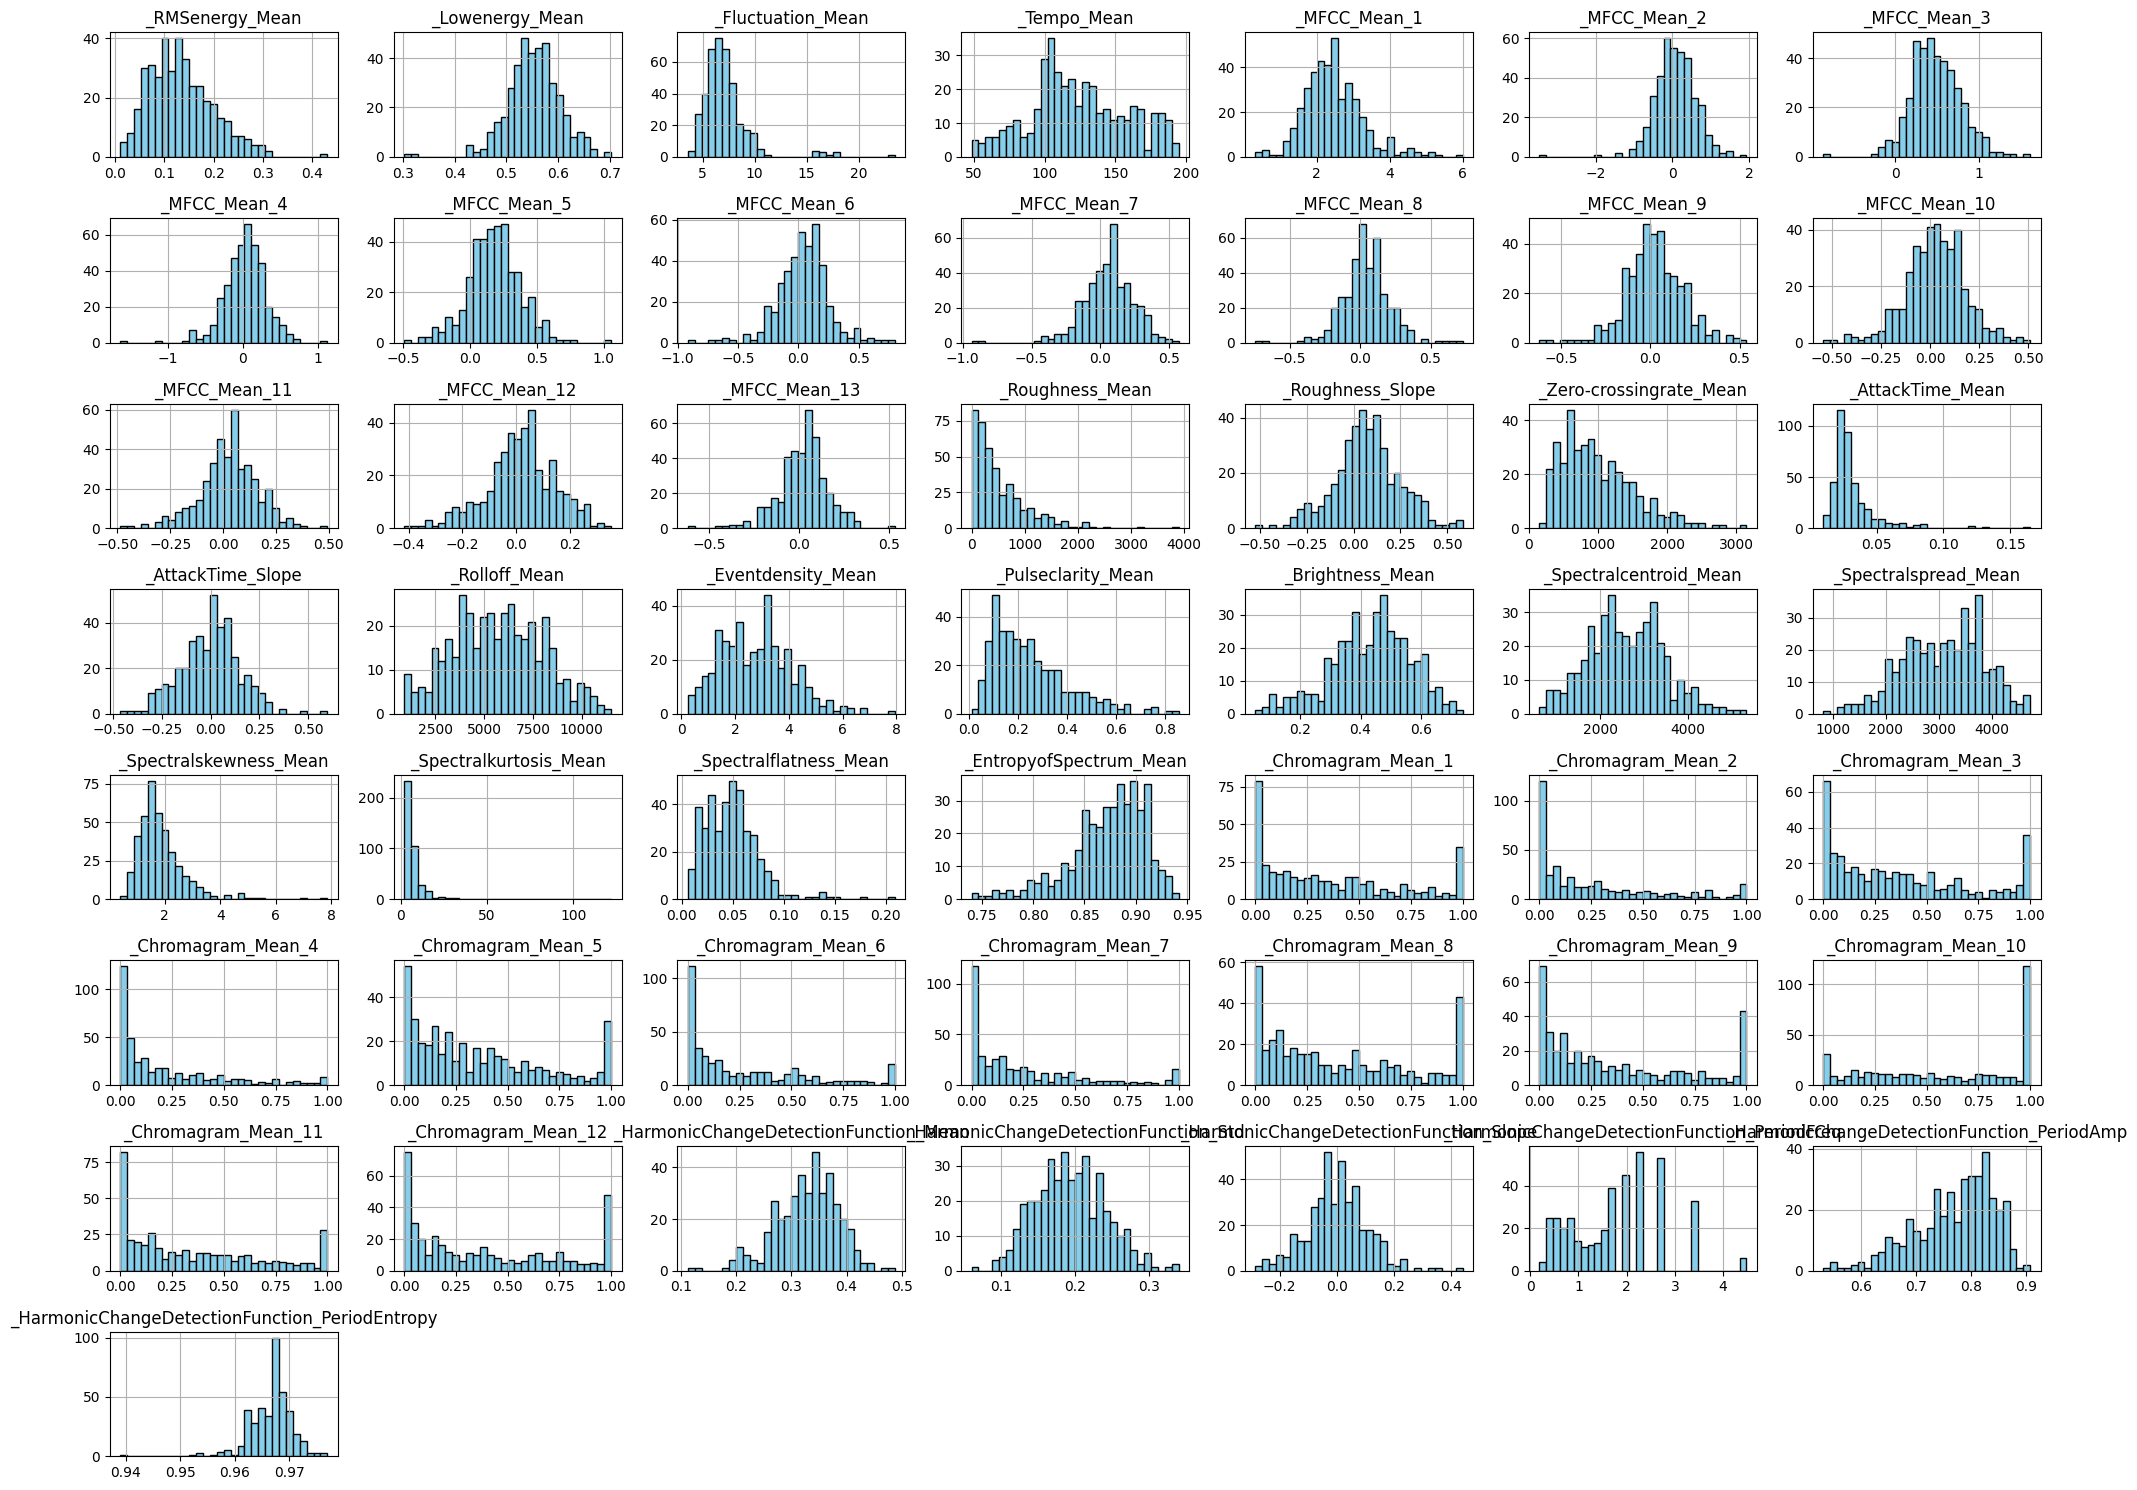

In [ ]:
music.hist(figsize=(20,15), bins=30, color='skyblue', edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

Histogram plots have been plotted for all the numeric dependent variables and it has been found out most of the variables are normally distributed, with the exception of Roughness Mean, AttackTime Mean, PulseClarity Mean, SpectralKurtosis Mean, Chromogram Mean.  SpectralFlatness Mean, Roughness Mean are showing excessive positive skew.   On the other hand, Entropy of Spectrum Mean is showing negative skew.

# Bar plot showing the distribution number of target variables

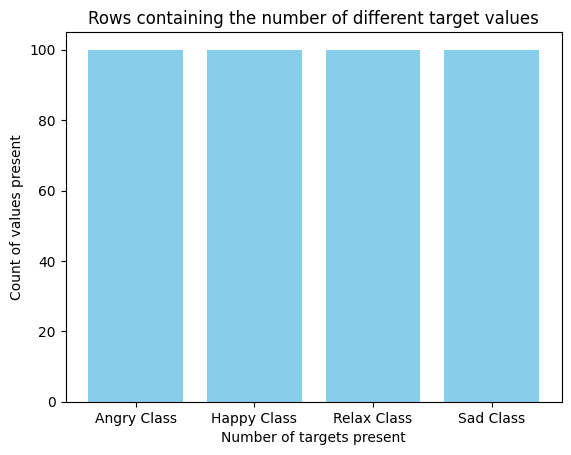

In [7]:
import matplotlib.pyplot as plt
count_1 = music[music['Class'] == 'angry'].shape[0]
count_2 = music[music['Class'] == 'happy'].shape[0]
count_3 = music[music['Class'] == 'relax'].shape[0]
count_4 = music[music['Class'] == 'sad'].shape[0]

plt.bar(['Angry Class','Happy Class','Relax Class','Sad Class'], [count_1,count_2,count_3,count_4], color='skyblue')

plt.xlabel('Number of targets present')
plt.ylabel('Count of values present')
plt.title('Rows containing the number of different target values')

plt.show()

As seen from the above bar chart, the number of target variables are equally distributed

# Correlation plot

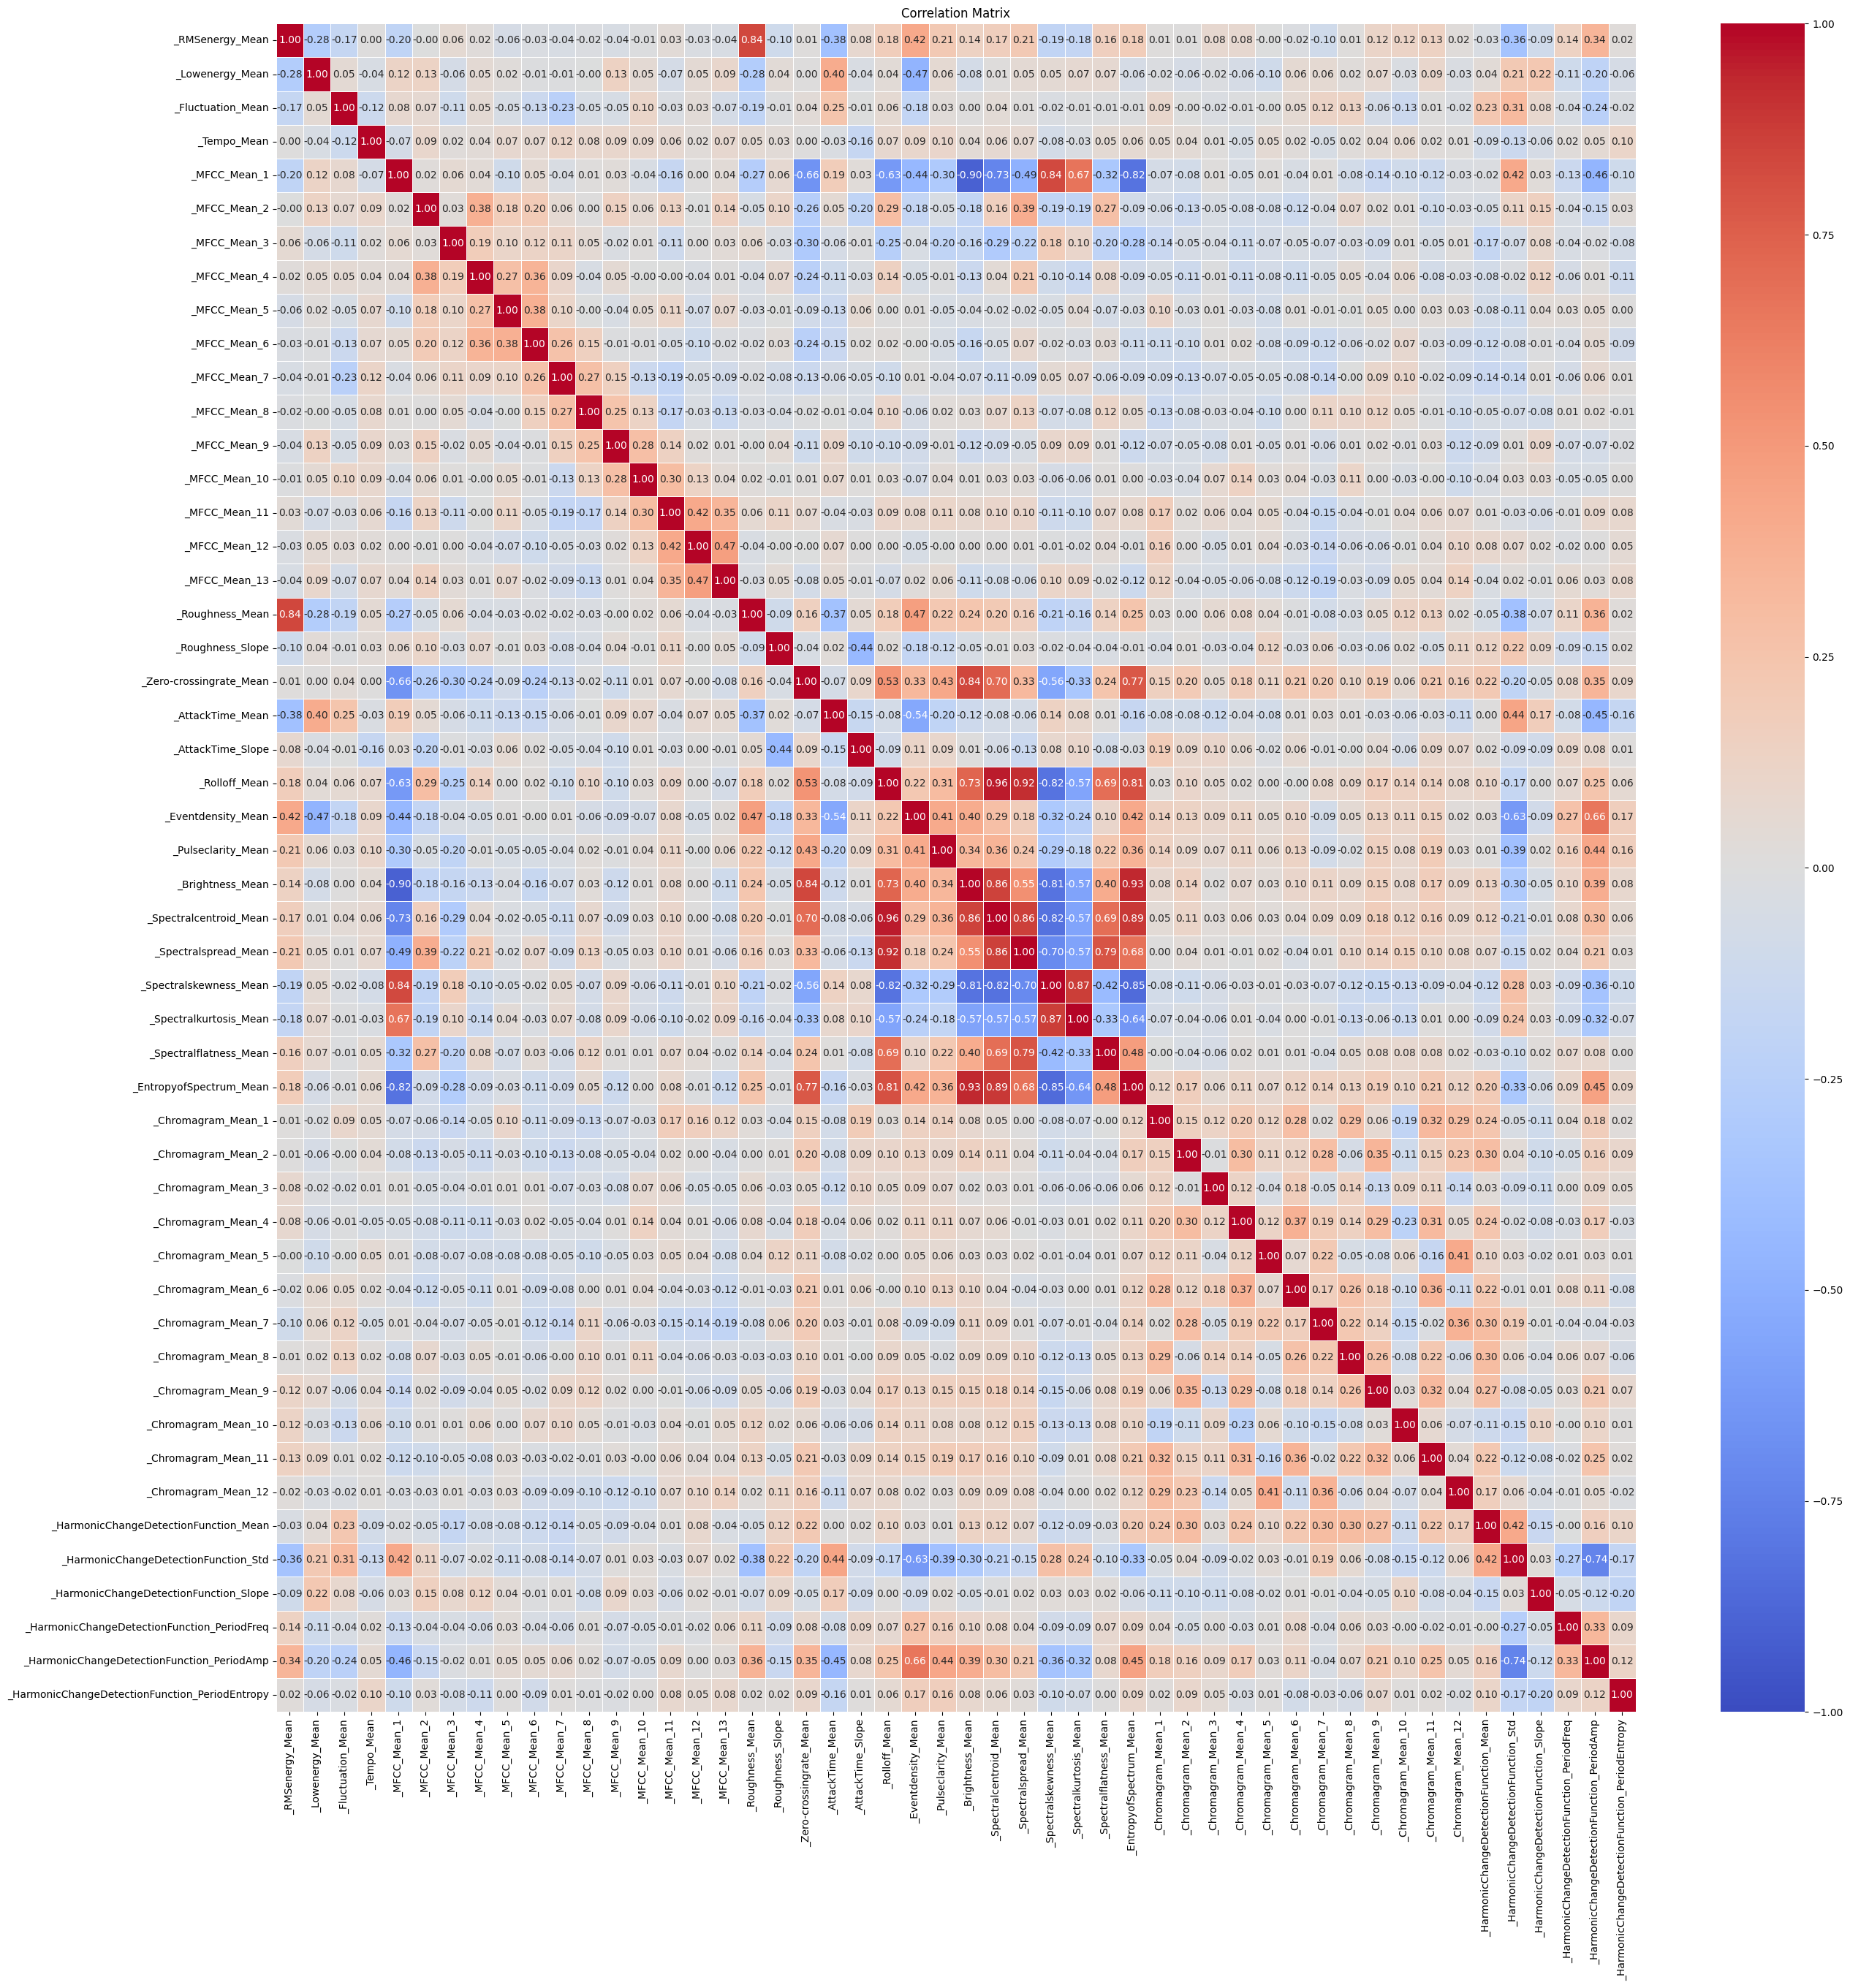

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = music.select_dtypes(include=['number']).corr()
#print(corr_matrix)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#highly_correlated = corr_matrix[abs(corr_matrix) > 0.9]
#print("Highly correlated pairs (threshold 0.9):")
#print(highly_correlated)



As correlation does not affect the ANN in a big way, model is being created without dropping them.  

Using the labelencoder to encode the target variable, as the target variable is categorical with four values.
Separating the feature and target to X and y dataframes/series.
Performing standard scaling on the feature dataset as, ANN are sensitive to the number scale.
Performing Train and Test split using scikit in ratio of 80:20.
Converting to tensors and creating dataloader.
Built, trained and evaluated the model.


#Model Building  

Tensor dataset has been used and provided with the data and loaded with dataloader which is a wrapper function and it supports automatic batching, sampling, shuffling and multiprocess data loading.
In the following pytorch code,  custom module is being defined class ANN_Model(nn.Module) and used.
Forward layer is defined where the input would be tensors and again producing tensors as output. Predicted values will be compared against the loss function.
In the backward pass, the gradients will be made to zero and the weights will be updated.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset

# -----------------------------------
# 1. Load Your Data
# -----------------------------------

# Assuming your data is in a CSV file (replace 'music_data.csv' with your actual filename)
# You can also create a dataframe manually if needed

# Example data loading
data = music

# -----------------------------------
# 2. Preprocessing
# -----------------------------------

# Encode the Class column (Label Encoding for multiclass)
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Separate features and labels
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Feature scaling (Standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

# -----------------------------------
# 3. Build the ANN Model
# -----------------------------------

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(np.unique(y))  # Number of unique classes
learning_rate = 0.001
num_epochs = 50

# Neural Network Model
class ANN_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANN_Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

model_nodrop = ANN_Model(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_nodrop.parameters(), lr=learning_rate)

# -----------------------------------
# 4. Train the Model
# -----------------------------------

for epoch in range(num_epochs):
    model_nodrop.train()

    for features_batch, labels_batch in train_loader:
        # Forward pass
        outputs = model_nodrop(features_batch)
        loss = criterion(outputs, labels_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# -----------------------------------
# 5. Evaluate the Model
# -----------------------------------

model_nodrop.eval()
with torch.no_grad():
    outputs = model_nodrop(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Accuracy on test set: {accuracy.item() * 100:.2f}%')



Epoch [1/50], Loss: 1.3128
Epoch [10/50], Loss: 0.1511
Epoch [20/50], Loss: 0.0372
Epoch [30/50], Loss: 0.0079
Epoch [40/50], Loss: 0.0040
Epoch [50/50], Loss: 0.0019
Accuracy on test set: 80.00%


#Hyperparameter tuning using Optuna libraries  

Using Optuna libraries for hyperparameter tuning to get the better values for following,

learning_rate   
hidden_size  
num_epochs   
batch_size   

Number of Epochs - the number times to iterate over the dataset
Batch Size - the number of data samples propagated through the network before the parameters are updated
Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [ ]:

import optuna

# Define an objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    num_epochs = trial.suggest_int('num_epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    # Initialize the model
    model_opt = ANN_Model(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
    optimizer = optim.Adam(model_opt.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Create DataLoader with the current batch size
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    # Train the model
    for epoch in range(num_epochs):
        model_opt.train()
        for features_batch, labels_batch in train_loader:
            outputs = model_opt(features_batch)
            loss = criterion(outputs, labels_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model_opt.eval()
    with torch.no_grad():
        outputs = model_opt(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test_tensor).float().mean()

    return accuracy.item()

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
print("Best hyperparameters:", study.best_params)


[I 2025-03-29 16:13:14,658] A new study created in memory with name: no-name-e18e0a57-694e-418c-a455-aee6a8800c85
<ipython-input-16-3393a28924b9>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2025-03-29 16:13:16,348] Trial 0 finished with value: 0.637499988079071 and parameters: {'learning_rate': 3.504121270823175e-05, 'hidden_size': 60, 'num_epochs': 49, 'batch_size': 29}. Best is trial 0 with value: 0.637499988079071.
[I 2025-03-29 16:13:18,859] Trial 1 finished with value: 0.8125 and parameters: {'learning_rate': 0.02577957543368843, 'hidden_size': 102, 'num_epochs': 49, 'batch_size': 19}. Best is trial 1 with value: 0.8125.
[I 2025-03-29 16:13:19,380] Trial 2 finished with value: 0.637499988079071 and parameters: {'learning_rate': 0.0988304048211753

Best hyperparameters: {'learning_rate': 0.008952444254711889, 'hidden_size': 90, 'num_epochs': 36, 'batch_size': 20}


After performing Hyperparameter turning, rebuilding the model and training it once again.

In [ ]:
best_params = study.best_params
learning_rate = best_params['learning_rate']
hidden_size = best_params['hidden_size']
num_epochs = best_params['num_epochs']
batch_size = best_params['batch_size']

print("Best Hyperparameters:", best_params)

# Reinitialize the model with the best hyperparameters
model_tuned = ANN_Model(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# Set the optimizer and criterion
optimizer = optim.Adam(model_tuned.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Create the DataLoader with the best batch size
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Train the model with the best hyperparameters
for epoch in range(num_epochs):
    model_tuned.train()
    for features_batch, labels_batch in train_loader:
        outputs = model_tuned(features_batch)
        loss = criterion(outputs, labels_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')



Best Hyperparameters: {'learning_rate': 0.008952444254711889, 'hidden_size': 90, 'num_epochs': 36, 'batch_size': 20}
Epoch [1/36], Loss: 0.4453
Epoch [10/36], Loss: 0.0119
Epoch [20/36], Loss: 0.0002
Epoch [30/36], Loss: 0.0002


#Evaluating Model Metrics

Calculating Accuracy, Confusion matrix, ROC curve for the models

Accuracy on test set with Optuna tuned model 78.75%
Confusion Matrix:
 [[14  1  1  2]
 [ 0 17  1  0]
 [ 0  0 20  6]
 [ 2  2  2 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.85      0.94      0.89        18
           2       0.83      0.77      0.80        26
           3       0.60      0.67      0.63        18

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



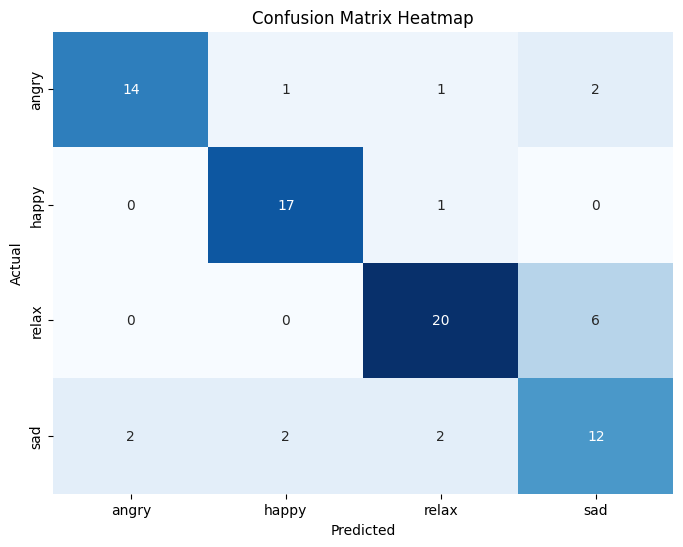

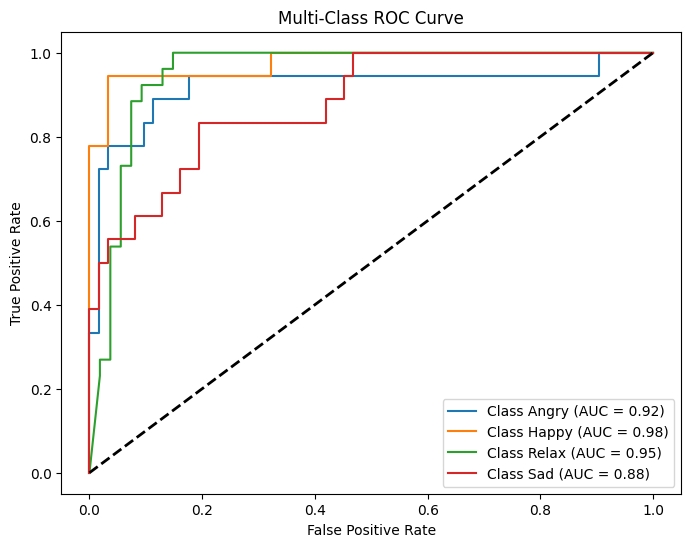

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- Evaluate the model ---
with torch.no_grad():
    outputs = model_tuned(X_test_tensor)  # Forward pass on test data

    # Get predicted probabilities using Softmax
    y_prob = torch.softmax(outputs, dim=1).cpu().numpy()  # Convert tensor to NumPy

    _, predicted_tuned = torch.max(outputs, 1)  # Get predicted class (index of max log-probability)
    accuracy = (predicted_tuned == y_test_tensor).float().mean()
    print(f'Accuracy on test set with Optuna tuned model {accuracy.item() * 100:.2f}%')

# --- Confusion Matrix ---
# Convert tensors to numpy arrays (required by sklearn)
y_true = y_test_tensor.cpu().numpy()
y_pred = predicted_tuned.cpu().numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Optional: print the confusion matrix values and classification report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# --- Plot the Confusion Matrix as a Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["angry", "happy",'relax','sad'], yticklabels=["angry", "happy",'relax','sad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# --- Binarize the true labels for multi-class ROC ---
n_classes = y_prob.shape[1]  # Number of classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# --- Compute ROC curve and AUC for each class ---
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Plot Multi-Class ROC Curve ---
plt.figure(figsize=(8, 6))
class_names = {0: "Class Angry", 1: "Class Happy", 2: "Class Relax", 3: "Class Sad"}  # Replace with actual names
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
y_pred

array([3, 3, 3, 3, 2, 2, 0, 3, 3, 1, 2, 0, 3, 2, 1, 3, 0, 0, 3, 3, 2, 2,
       0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2, 2,
       3, 0, 1, 1, 2, 1, 2, 0, 3, 2, 0, 2, 3, 1, 2, 1, 1, 3, 1, 2, 1, 2,
       1, 3, 0, 2, 2, 1, 2, 3, 0, 3, 1, 0, 1, 2])

In [ ]:
predicted_tuned

tensor([3, 3, 3, 3, 2, 2, 0, 3, 3, 1, 2, 0, 3, 2, 1, 3, 0, 0, 3, 3, 2, 2, 0, 3,
        2, 0, 1, 3, 0, 1, 0, 1, 2, 2, 3, 2, 1, 0, 1, 1, 0, 2, 2, 2, 3, 0, 1, 1,
        2, 1, 2, 0, 3, 2, 0, 2, 3, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 0, 2, 2, 1,
        2, 3, 0, 3, 1, 0, 1, 2])

In [ ]:
for name, param in model_tuned.named_parameters():
    print(f"Name: {name} | Shape: {param.shape}")
    print(param.data)

Name: fc1.weight | Shape: torch.Size([90, 50])
tensor([[ 2.8487e-04, -2.0882e-01,  2.2861e-02,  ...,  1.4294e-02,
         -2.9682e-01,  1.4399e-02],
        [ 7.6219e-02, -2.9922e-01, -2.1772e-01,  ...,  1.8382e-02,
         -9.9088e-02,  1.9894e-01],
        [-1.1821e-02,  1.7274e-01, -1.6596e-02,  ..., -1.6036e-01,
          2.6061e-01,  3.5902e-02],
        ...,
        [-3.9825e-03, -1.9298e-01,  1.4699e-02,  ...,  9.8248e-02,
         -2.0054e-01, -3.0143e-02],
        [-1.0115e-01, -4.3123e-03,  4.7310e-02,  ...,  1.3806e-01,
          8.2068e-02,  6.3038e-02],
        [ 4.0890e-02, -2.2567e-02,  1.1742e-02,  ..., -1.4846e-01,
          1.2430e-02, -1.7560e-01]])
Name: fc1.bias | Shape: torch.Size([90])
tensor([-0.0204,  0.0038, -0.0338,  0.0288,  0.0201, -0.1809, -0.0091, -0.0572,
        -0.2291, -0.1073, -0.2110, -0.1163, -0.0768,  0.0192, -0.0377, -0.0308,
        -0.0969, -0.1561, -0.2360,  0.1283, -0.1517,  0.0904,  0.1455,  0.0932,
        -0.0985, -0.0224, -0.0105, -0.08

#Alternative KNN Model:


KNN model has been tried by using the cross_val_score from sklearn.
5 folds has been used for CV and the best k value has been chosen based on the predicted accuracy.
The k value vs accuracy has also been plotted.

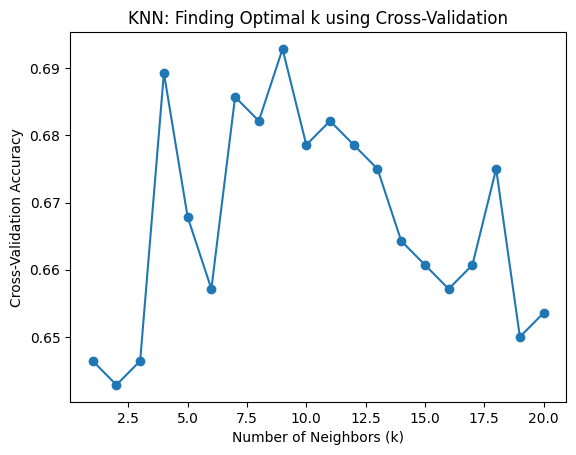

Optimal k value: 9


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


df = music

# Step 2: Separate features and target
Xknn = df.drop(columns=['Class'])
yknn = df['Class']

# Step 3: Train/Test Split (optional since the dataset is small, but recommended for larger data)
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(Xknn, yknn, test_size=0.30, random_state=42)

# Step 4: Feature Scaling (Important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaledknn = scaler.fit_transform(X_trainknn)
X_test_scaledknn = scaler.transform(X_testknn)

k_values = list(range(1, 21))  # Test k values from 1 to 20
cv_scores = []  # To store the mean cross-validation scores for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaledknn, y_trainknn, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Step 6: Plot the cross-validation scores
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Finding Optimal k using Cross-Validation')
plt.show()

# Step 7: Find the best k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k value: {optimal_k}")



#Hyperparameter tuning the KNN model  

Knn model is once again built with the above optimum values of k and predictions obtained.

Accuracy: 0.6333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67        28
           1       0.65      0.96      0.77        25
           2       0.80      0.43      0.56        37
           3       0.56      0.47      0.51        30

    accuracy                           0.63       120
   macro avg       0.65      0.66      0.63       120
weighted avg       0.66      0.63      0.62       120



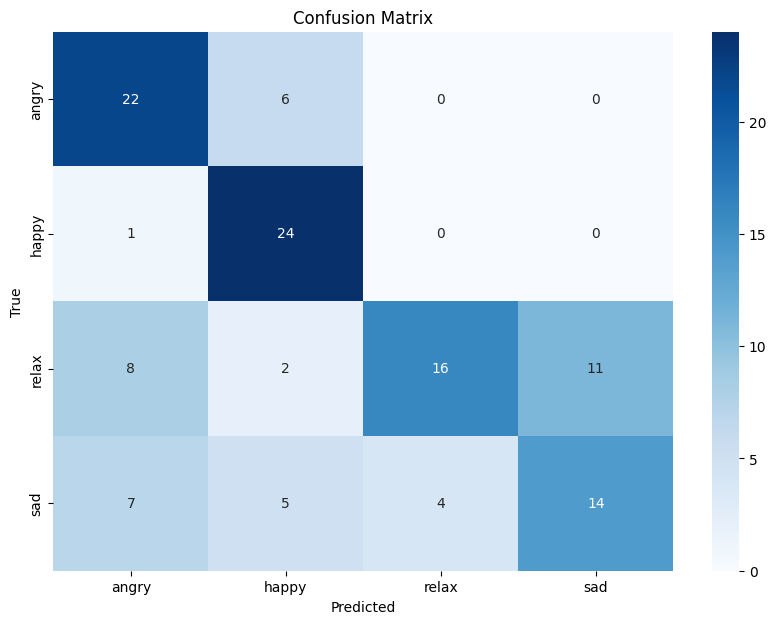

In [ ]:
# Step 5: Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=9)  # You can tune k (number of neighbors)
knn.fit(X_train_scaledknn, y_trainknn)

# Step 6: Predictions
y_predknn = knn.predict(X_test_scaledknn)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_testknn, y_predknn))
print("Classification Report:\n", classification_report(y_testknn, y_predknn))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_testknn, y_predknn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["angry", "happy",'relax','sad'], yticklabels=["angry", "happy",'relax','sad'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



The prediction accuracy is found to be 63% which is lesser than the above ANN model.

Additional activity:
=====================

Creating a synthetic dataset by adding noise to the data.  This might not be the accurate representation of dataset.

In [ ]:
import pandas as pd
import numpy as np

# How many new rows you want to generate
num_new_rows = 400

# Randomly sample existing rows
new_rows = music.sample(n=num_new_rows, replace=True).reset_index(drop=True)

# Separate features and target
features = new_rows.drop(columns=['Class'])
labels = new_rows['Class'].reset_index(drop=True)

# Add noise (adjust scale based on your data)
noise = np.random.normal(0, 1, features.shape)

# Add noise to features only
features_noisy = features + noise

# Combine the noisy features with the original class labels
music_test = pd.concat([labels, features_noisy], axis=1)

# Combine with original dataset
#df_expanded = pd.concat([music, new_rows_with_class], ignore_index=True)

#print(music_test.info)


Testing on the dataset with noise by using tuned model.  This might not be the accurate representation of the dataset, as this is a synthetically generated.
As it is not an accurate representation of data, accuracy of 26% is obtained.

In [ ]:
features_noisy

# -----------------------------------
# 6. Predict New Samples (Optional)
# -----------------------------------
new_sample = torch.tensor(features_noisy.to_numpy(), dtype=torch.float32)
prediction = model_tuned(new_sample)
predicted_class = torch.argmax(prediction, dim=1)
#print("Predicted class label:", label_encoder.inverse_transform(predicted_class.numpy()))

from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
music_test['Class'] = label_encoder.fit_transform(music_test['Class'])


# Compute accuracy
accuracy_noisy = accuracy_score(music_test['Class'], predicted_class)

print("Accuracy:", accuracy_noisy)




Accuracy: 0.2575


#Conclusion

An Artificial Neural Network model has been built with Pytorch and Optuna libraries for hyperparameter tuning has been implemented and the following model metrics obtained,  

Accuracy = 78.75%  
  
F1 score = 0.82 for angry, 0.89 for happy, 0.80 for relax and 0.63 for sad.  

RoC = More than 0.92 for all classes except for sad class.  


One another alternative KNN model has also been built the following model metrics obtained which are far lesser than the earlier ANN model.  

Accuracy = 63%  

F1 score = 0.67 for angry, 0.77 for happy, 0.56 for relax and 0.51 for sad.  

A synthetic dataset has also been created by adding noise to the data.   This data has been used to test for validation in addition to the regular train/test split of data.  However, this synthetic dataset should not be used as a yard stick to measure the performance as even minor changes in the numerical value of these columns will change the target a lot.  This additional step is done for only learning purposes.  The accuracy is found to be 26% when ANN model is being used.  

As seen from the model metrics evaluation and comparison, ANN model has been recommended over KNN model.
